# Exercise class 8

- Name: Marco
- E-Mail: mberten@math.uzh.ch (<24h, else send another mail)
- Rocket-Chat: https://hello.math.uzh.ch $\to$ mberten
- Github: https://github.com/Bertenghi
  - Additional exercises on my git.

# Plotting

This week we discuss how to produce plots in Python.

## Standard libraries (import)

In [1]:
import numpy as np  #  arguably the easiest way to produce "data"
import matplotlib.pyplot as plt  # to create our plots

It is easy to proof/verify that $e^x \geq x+1$ for all $x \in \mathbb{R}$ (for instance, by using that $\exp$ is a convex function). We want to verify this inequality visually.

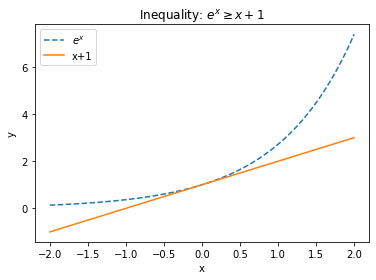

In [73]:
x_axis = np.linspace(-2,2,100)  # 100 points between -2 and 5 (evenly spaced)
plt.plot(x_axis, np.exp(x_axis), label = "$e^x$", linestyle = "--")
plt.plot(x_axis, x_axis+1, label = "x+1", linestyle = "-")
plt.legend()                                #  legends are important
plt.title("Inequality: $e^x \geq x+1$")      #  just like titles
plt.xlabel("x")                             #  and x-y labels (axis declaration)
plt.ylabel("y")
plt.show()

In [16]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

## Exercise 2

Monte Carlo methods are a broad class of computational algorithms that rely on repeated
random sampling to obtain numerical results. The underlying concept is to use randomness to
solve problems that might be deterministic in principle. One of the basic examples of getting
started with the Monte Carlo algorithm is the estimation of π.

Consider a unit disk inscribed inside a unit square (both centered around the origin $0=(0,0)$), it then holds that 

$$ \frac{\text{Area of unit disk}}{\text{Area of unit square}} = \frac{\pi}{4}.$$

Let $\mathbb{S}$ denote the unit square, then sampling a (very) large number uniformly at random in $\mathbb{S}$ we have 

$$ \frac{\text{Total number of points generated inside $\mathbb{S}$}}{\text{Total points}} = \frac{\pi}{4} $$

In [18]:
def monteCarloPi(N : int) -> float:
    """
    A function that approximates pi using the Monte Carlo method.

        Input: N Integer >= 1
        Output: Approximation of pi as a float
    """

    # draw uniform at random (x,y) in [-1,1]x[-1,1] for a total of N points 
    data = np.random.uniform(-1.0, 1.0, (N, 2))         
    
    # Count points that are within distance 1.0 from center (i.e. inside the circle)
    inside = np.linalg.norm(data, axis = 1) <= 1.0
    count = np.count_nonzero(inside)
    return 4*(count / N)

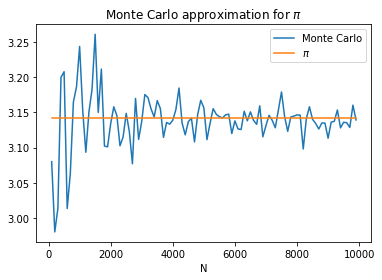

In [39]:

# Create data for x-axis
data = np.arange(100, 10000, 100)

# We need to create the relationship y=f(x)
# We can achieve this via a loop or using the map function

y = list(map(monteCarloPi, data))       # call list on map function else it creates Python "map object"
plt.plot(data, y, label = "Monte Carlo")
plt.plot(data, [np.pi]*len(data), label = "$\pi$")
plt.legend()
plt.title("Monte Carlo approximation for $\pi$")
plt.xlabel("N")
plt.show()

## Exercise 3

The `Sieve of Eratosthenes`:

In [42]:
def sieveOfEratosthenes(n : int) -> list:
    """
    A function that returns for a given integer n a list of
    prime numbers up to n using the sieve of Eratosthenes
    algorithm. If n itself is prime, n will be included in the list.

        Input: n Integer >= 2
        Output: List of prime numbers up to n 
    """
    primes = [True]*(n+1)                   # create a list of primes, at first all are set to True

    for i in range(2, int(n**0.5) + 1):
        if primes[i] == True:               # find the next "unmarked" prime.
            for j in range(i**2, n + 1, i): # remove multiples of said prime (optimisation: start at i**2)
                primes[j] = False           # False indicates it is not a prime (as its a multiple)

    # finally, return only in the indexes of primes which have a True (prime) stored, starting with index 2.
    return [idx for idx in range(2, n + 1) if primes[idx] == True]

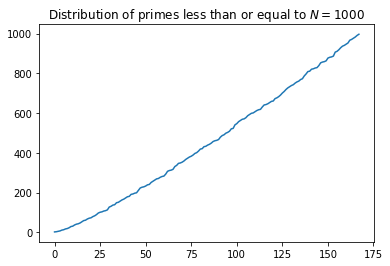

In [44]:
# Below, sieving prime numbers up to N=1000 and plot them against their indices, starting from 0 to len(sieveOfEratostehnes(1000))-1
plt.plot(sieveOfEratosthenes(1000))
plt.title("Distribution of primes less than or equal to $N=1000$")
plt.show()

Another approach to sieving would be to `filter`. In order to filter in Python we need a function that determines whether a given number $n \geq 2$ is prime or not.

In [47]:
def isPrime(n : int) -> bool:
    """
    A prime test function using the 6k +/- 1 optimisation: 
    Every prime number p > 3 is of the form 6k +/- 1 for some k in {1,2,3,...}

        Input: Integer n >= 0
        Output: Bool (True/False)
    """
    if n <= 3:
        return n > 1
    
    # if n is even, it is not prime
    # also takes care of numbers divisible by 3
    if not n%2 or not n%3:
        return False

    # 6k +- 1 optimisation
    k = 5

    while k <= int(n**.5):
        if not n % k or not n % (k+2):
            return False
        k += 6
    return True

Beware however, although filtering is elegant and convenient, it can be (very) `inefficient`!

Below we see that the ancient sieve of Eratosthenes already outperforms the $6k \pm 1$ optimisation of prime filtering for $N=10^6$. Keep in mind that the sieve of Eratosthenes is ancient (2nd century), and meanwhile there are further optimisations of sieving methods (such as Sieve of Sundaram or Sieve of Atkins).

In [ ]:
N = 10**6

In [72]:
list(filter(isPrime, range(2, N // 10)))

[2,
 3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97,
 101,
 103,
 107,
 109,
 113,
 127,
 131,
 137,
 139,
 149,
 151,
 157,
 163,
 167,
 173,
 179,
 181,
 191,
 193,
 197,
 199,
 211,
 223,
 227,
 229,
 233,
 239,
 241,
 251,
 257,
 263,
 269,
 271,
 277,
 281,
 283,
 293,
 307,
 311,
 313,
 317,
 331,
 337,
 347,
 349,
 353,
 359,
 367,
 373,
 379,
 383,
 389,
 397,
 401,
 409,
 419,
 421,
 431,
 433,
 439,
 443,
 449,
 457,
 461,
 463,
 467,
 479,
 487,
 491,
 499,
 503,
 509,
 521,
 523,
 541,
 547,
 557,
 563,
 569,
 571,
 577,
 587,
 593,
 599,
 601,
 607,
 613,
 617,
 619,
 631,
 641,
 643,
 647,
 653,
 659,
 661,
 673,
 677,
 683,
 691,
 701,
 709,
 719,
 727,
 733,
 739,
 743,
 751,
 757,
 761,
 769,
 773,
 787,
 797,
 809,
 811,
 821,
 823,
 827,
 829,
 839,
 853,
 857,
 859,
 863,
 877,
 881,
 883,
 887,
 907,
 911,
 919,
 929,
 937,
 941,
 947,
 953,
 967,
 971,
 977,
 983,
 991,
 997,
 1009,
 1013,
 1019,


In [70]:
sieveOfEratosthenes(N)

[2,
 3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97,
 101,
 103,
 107,
 109,
 113,
 127,
 131,
 137,
 139,
 149,
 151,
 157,
 163,
 167,
 173,
 179,
 181,
 191,
 193,
 197,
 199,
 211,
 223,
 227,
 229,
 233,
 239,
 241,
 251,
 257,
 263,
 269,
 271,
 277,
 281,
 283,
 293,
 307,
 311,
 313,
 317,
 331,
 337,
 347,
 349,
 353,
 359,
 367,
 373,
 379,
 383,
 389,
 397,
 401,
 409,
 419,
 421,
 431,
 433,
 439,
 443,
 449,
 457,
 461,
 463,
 467,
 479,
 487,
 491,
 499,
 503,
 509,
 521,
 523,
 541,
 547,
 557,
 563,
 569,
 571,
 577,
 587,
 593,
 599,
 601,
 607,
 613,
 617,
 619,
 631,
 641,
 643,
 647,
 653,
 659,
 661,
 673,
 677,
 683,
 691,
 701,
 709,
 719,
 727,
 733,
 739,
 743,
 751,
 757,
 761,
 769,
 773,
 787,
 797,
 809,
 811,
 821,
 823,
 827,
 829,
 839,
 853,
 857,
 859,
 863,
 877,
 881,
 883,
 887,
 907,
 911,
 919,
 929,
 937,
 941,
 947,
 953,
 967,
 971,
 977,
 983,
 991,
 997,
 1009,
 1013,
 1019,
